In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

bernoulli_model = CmdStanModel(stan_file = 'bern_1.stan')
bern_fit = bernoulli_model.sample(data = 'bern_1.data.json')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


(array([ 12.,  60., 140., 245., 338., 395., 412., 403., 385., 408., 319.,
        270., 201., 158., 104.,  74.,  38.,  17.,  15.,   6.]),
 array([0.0237209 , 0.0615015 , 0.09928211, 0.13706272, 0.17484332,
        0.21262392, 0.25040453, 0.28818513, 0.32596574, 0.36374635,
        0.40152695, 0.43930756, 0.47708816, 0.51486877, 0.55264937,
        0.59042998, 0.62821058, 0.66599119, 0.70377179, 0.7415524 ,
        0.779333  ]),
 <BarContainer object of 20 artists>)

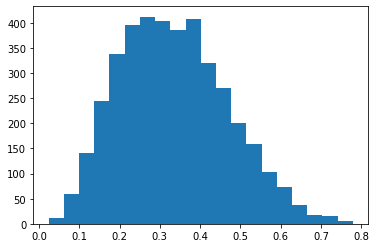

In [3]:
theta = bern_fit.stan_variable('theta')
plt.hist(theta, bins=20)

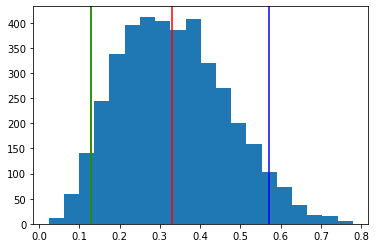

In [4]:
summary = bern_fit.summary()
summary = summary.iloc[1]
plt.hist(theta, bins=20)
plt.axvline(summary['Mean'], color='r')
plt.axvline(summary['StdDev'], color='y')
plt.axvline(summary['5%'], color='g')
plt.axvline(summary['95%'], color='b')
plt.show()